# Load the packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nibabel.testing import data_path
import nibabel as nib
import nrrd

/home/u/yuehchou/.conda/envs/disorder/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)
/home/u/yuehchou/.conda/envs/disorder/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import os
import random

In [4]:
from importlib import reload

In [5]:
import pre_processing as pp

In [69]:
# reload(pp)
# import pre_processing as pp

# Get all folder names

In [6]:
listOfFiles = [d for d in os.listdir('./Mask/')]
num = len(listOfFiles)
num

14

# Load the image Reso_AP

In [7]:
img_AP = []
inf_AP = []

for i in np.arange(num):
    img_AP, inf_AP = pp.read_nrrdfile(imglist=img_AP,
                                   inflist=inf_AP,
                                   filepath='./Mask/' + listOfFiles[i] +'/Reso_AP.nrrd')


In [8]:
len(img_AP), len(inf_AP)

(14, 14)

In [9]:
img_AP[0].shape

(664, 664, 42)

In [10]:
inf_AP[0]

OrderedDict([('type', 'short'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([664, 664,  42])),
             ('space directions', array([[0.5, 0. , 0. ],
                     [0. , 0.5, 0. ],
                     [0. , 0. , 5. ]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin',
              array([-158.67578125, -324.67578125, -220.        ]))])

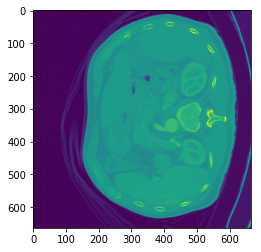

In [11]:
plt.imshow(img_AP[0][:,:,20])

# Load the image Regi_reso_DP

In [12]:
img_DP = []
inf_DP = []

for i in np.arange(num):
    img_DP, inf_DP = pp.read_nrrdfile(imglist=img_DP,
                                   inflist=inf_DP,
                                   filepath='./Mask/' + listOfFiles[i] +'/Regi_reso_DP.nrrd')


In [13]:
len(img_DP), len(inf_DP)

(14, 14)

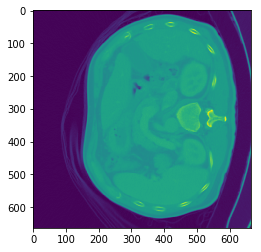

In [14]:
plt.imshow(img_DP[0][:,:,20])

# Load the image Regi_Reso_PC

In [15]:
img_PC = []
inf_PC = []

for i in np.arange(num):
    img_PC, inf_PC = pp.read_nrrdfile(imglist=img_PC,
                                   inflist=inf_PC,
                                   filepath='./Mask/' + listOfFiles[i] +'/Regi_reso_PC.nrrd')


In [16]:
len(img_PC), len(inf_PC)

(14, 14)

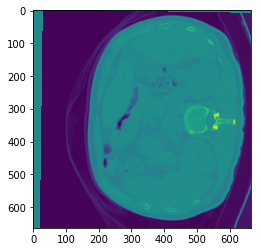

In [17]:
plt.imshow(img_PC[0][:,:,20])

In [18]:
np.max(img_PC[0]), np.min(img_PC[0])

(1271.9331, -1023.30286)

# Load the label Reso_AP-label

In [19]:
label_img_AP = []
label_inf_AP = []

for i in np.arange(num):
    label_img_AP, label_inf_AP = pp.read_nrrdfile(imglist=label_img_AP,
                                                  inflist=label_inf_AP,
                                                  filepath='./Mask/' + listOfFiles[i] +'/Reso_AP-label.nrrd')
    

In [20]:
len(label_img_AP), len(label_inf_AP)

(14, 14)

In [21]:
label_img_AP[0].shape

(664, 664, 42)

In [22]:
label_inf_AP[0]

OrderedDict([('type', 'short'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([664, 664,  42])),
             ('space directions', array([[0.5, 0. , 0. ],
                     [0. , 0.5, 0. ],
                     [0. , 0. , 5. ]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin',
              array([-158.67578125, -324.67578125, -220.        ]))])

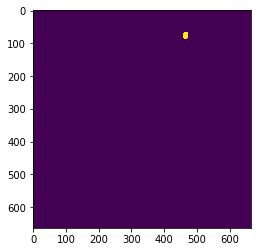

In [23]:
plt.imshow(label_img_AP[0][:,:,20])

# Combine the slice image and the slice label

In [24]:
Combi_reso_PC = []
for i in np.arange(len(label_img_AP)):
    Combi_reso_PC.append(pp.combine_image_mask(image=img_PC[i], mask=label_img_AP[i]))
    

In [25]:
len(Combi_reso_PC)

14

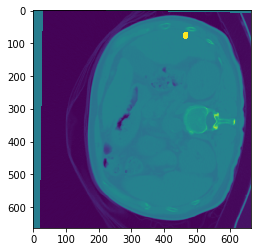

In [26]:
plt.imshow(Combi_reso_PC[0][:,:,20])

# Randomly change the shape

In [27]:
import change_shape as chg

In [28]:
# reload(chg)
# import change_shape as chg

## Test

In [29]:
random_times = 3

In [30]:
changed_mask = [None]*num
len(changed_mask)

14

In [31]:
for i in np.arange(num):
    for rd_t in np.arange(random_times):
        if type(changed_mask[i]) == type(None):
            size = label_img_AP[i].shape
            changed_mask[i] = np.empty([random_times, size[0], size[1], size[2]])
            changed_mask[i][rd_t,...] = chg.Random_change_shape(label_img_AP[i],2,1,3, -1,-1,-1, 0.8, 0.8, 0.9, 0)
        else:
            changed_mask[i][rd_t,...] = chg.Random_change_shape(label_img_AP[i],2,1,3, -1,-1,-1, 0.8, 0.8, 0.9, 0)

In [32]:
len(changed_mask), changed_mask[0].shape

(14, (3, 664, 664, 42))

In [33]:
np.max(label_img_AP[0]), np.min(label_img_AP[0]), np.max(changed_mask[0]), np.min(changed_mask[0])

(1, 0, 1.0, 0.0)

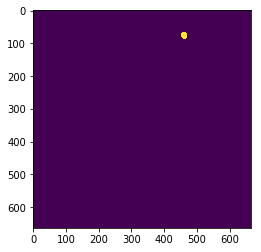

In [34]:
plt.imshow(label_img_AP[0][:,:,19])

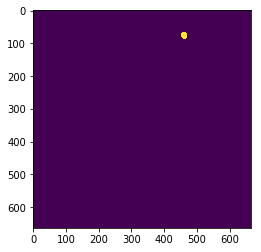

In [35]:
plt.imshow(changed_mask[0][0,:,:,19])

# Combine

In [36]:
changed_combine_image_mask = pp.combine_image_mask(image=img_AP[0], mask=changed_mask[0][0,...])

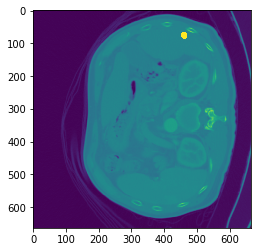

In [37]:
plt.imshow(changed_combine_image_mask[...,19])

# Normalization

In [71]:
np.shape(img_AP), np.shape(img_AP[0])

((14,), (664, 664, 42))

In [72]:
len(changed_mask), np.shape(changed_mask[0])

(14, (3, 664, 664, 42))

In [73]:
changed_mask_size = np.shape(changed_mask[0])
changed_mask_size = np.insert(changed_mask_size,0,len(changed_mask))
changed_mask_size

array([ 14,   3, 664, 664,  42])

In [78]:
Norm_img_AP = [None]*num*random_times

In [79]:
initial = True
for i in np.arange(num):
    for j in np.arange(random_times):
        Norm_img_AP[i*random_times + j] = pp.image_normalize(image=img_AP[i], mask=changed_mask[i][j,...], map_min=0 , map_max=256)
        

# Radiomics

In [80]:
from radiomics import featureextractor
import SimpleITK as sitk

In [81]:
extractor = featureextractor.RadiomicsFeaturesExtractor()
extractor

In [82]:
radiomics_features = [None]*num*random_times

In [99]:
for i in np.arange(changed_mask_size[0]):
    for j in np.arange(changed_mask_size[1]):
        result = extractor.execute(
                        sitk.GetImageFromArray(Norm_img_AP[i*random_times + j]),
                        sitk.GetImageFromArray(changed_mask[i][j,...].astype(int)))
        
        times = 0
        initial = True
        for key, value in result.items():
            if times > 15:
                if initial:
                    features = value
                    initial = False
                else:
                    features = np.insert(features, np.shape(features), value)
            times = times + 1
            
        radiomics_features[i*random_times + j] = features

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [100]:
np.shape(radiomics_features), np.shape(radiomics_features[0])

((42, 100), (100,))

In [105]:
np.shape(np.array(radiomics_features))

(42, 100)

# ICC Sikit Learn

In [101]:
from rpy2.robjects import DataFrame, FloatVector, IntVector
from rpy2.robjects.packages import importr
from math import isclose

In [107]:
groups = (np.ones([3*np.shape(radiomics_features[0])[0],1])*(np.arange(num)+1)).T
groups = groups.flatten()
values = np.array(radiomics_features).flatten()

r_icc = importr("ICC")
df = DataFrame({"groups": IntVector(groups),
                "values": FloatVector(values)})
icc_res = r_icc.ICCbare("groups", "values", data=df)
icc_val = icc_res[0] # icc_val now holds the icc value

In [108]:
icc_res, icc_val

(R object with classes: ('numeric',) mapped to:
 <FloatVector - Python:0x7ff8728766c8 / R:0x55bfe4d33ad8>
 [0.010494], 0.010494448136815895)

# Continue